notes taken from [this website](https://umap-learn.readthedocs.io/en/latest/basic_usage.html)

umap arguments

```python
UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)
```

In [1]:
!pip uninstall umap
!pip install umap-learn

^C


In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap.umap_ as umap

%matplotlib inline

In [ ]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [ ]:
digits = load_digits()
# print(digits.DESCR)

print('digits.data:')
print(type(digits.data))
print(digits.data.shape)        # (1797, 64): 1797 digits in total, each has embedding length = 64
print(digits.data)

print('digits.target:')
print(type(digits.target))
print(digits.target.shape)        # (1797,): 1797 digits in total, each has a target of 0~9
print(digits.target)

digits.data:
<class 'numpy.ndarray'>
(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
digits.target:
<class 'numpy.ndarray'>
(1797,)
[0 1 2 ... 8 9 8]


In [ ]:
reducer = umap.UMAP(random_state=42, n_components=3)
reducer.fit(digits.data)

embedding = reducer.transform(digits.data)
# Verify that the result of calling transform is idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

d:\Programs_in_D\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(1797, 3)

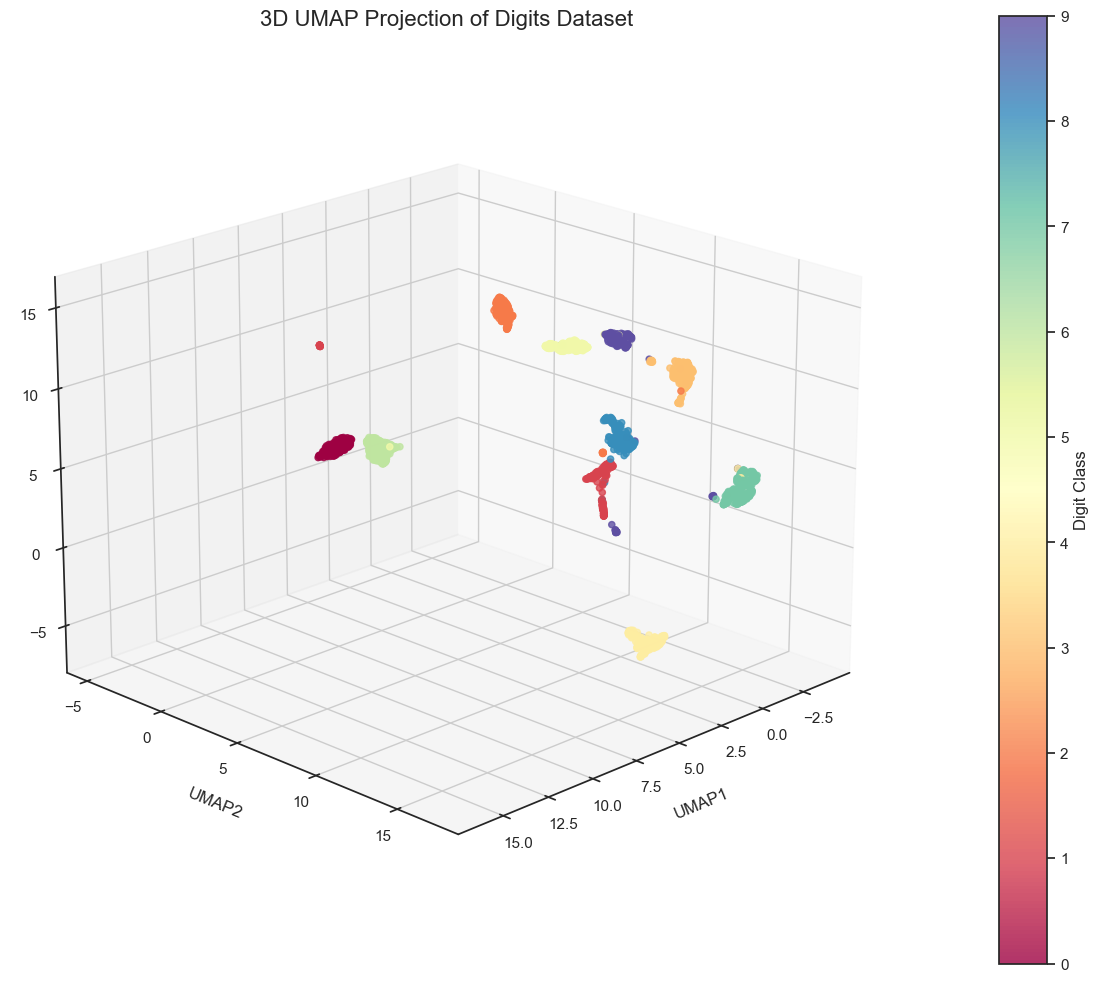

In [ ]:
# Create 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with spectral colormap
sc = ax.scatter(
    embedding[:, 0],  # UMAP1
    embedding[:, 1],  # UMAP2
    embedding[:, 2],  # UMAP3
    c=digits.target,  # Color by digit class
    cmap='Spectral',  # Same colormap as your 2D example
    s=20,            # Slightly larger points
    alpha=0.8,       # Some transparency
    depthshade=True  # Helps with 3D perception
)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_ticks(np.arange(10))  # Digits 0-9
cbar.set_label('Digit Class')

# Axis labels
ax.set_xlabel('UMAP1', fontsize=12, labelpad=10)
ax.set_ylabel('UMAP2', fontsize=12, labelpad=10)
ax.set_zlabel('UMAP3', fontsize=12, labelpad=10)
ax.set_title('3D UMAP Projection of Digits Dataset', fontsize=16, pad=20)

# Adjust viewing angle (elevation and azimuth)
ax.view_init(elev=20, azim=45)  # You can tweak these values

plt.tight_layout()
plt.show()